# 2(b). Import necessary libraries

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# 2(c). Load the Given Data

In [81]:
import pandas as pd
# Load data into a Pandas DataFrame
data = pd.read_csv("hw04_data.csv")

# select all rows, columns 0 and 1
X = data.iloc[:, 0:2].values
# select all rows, column 2
y = data.iloc[:, 2].values

# Visualization

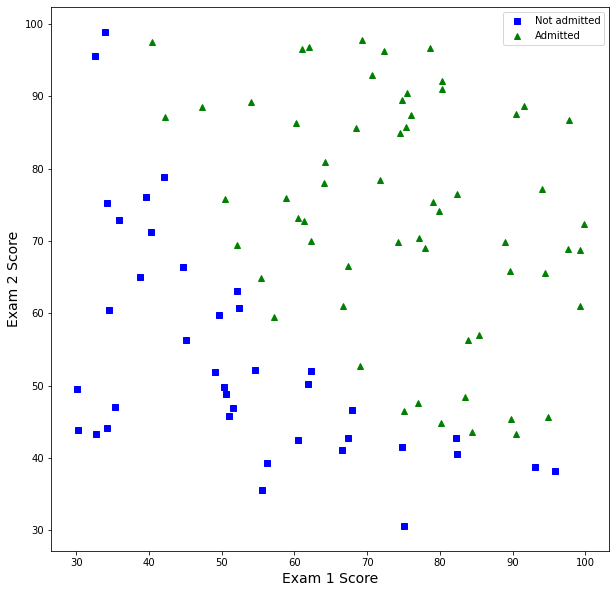

In [82]:
plt.figure(figsize=(10, 10))

# Plot the data for the “Not admitted” entries
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label = "Not admitted")
# Plot the data for the “Admitted” entries with the style of green triangles.

plt.plot(X[y==1, 0], X[y==1, 1], "g^", label = "Admitted")
plt.legend(loc="best")
# Add labels for the coordinates
plt.xlabel("Exam 1 Score", fontsize=14)
plt.ylabel("Exam 2 Score", fontsize=14)
plt.show()


# 4. Train the Logistic Regression model:

**4(a). Split the test data into the training set and test set**

In [83]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [84]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model with the "lbfgs" solver
log_reg = LogisticRegression(solver='lbfgs', random_state=42)

# Fit the training data to the model
log_reg.fit(X_train, y_train)


LogisticRegression(random_state=42)

# 5. Visualization the decision boundary:

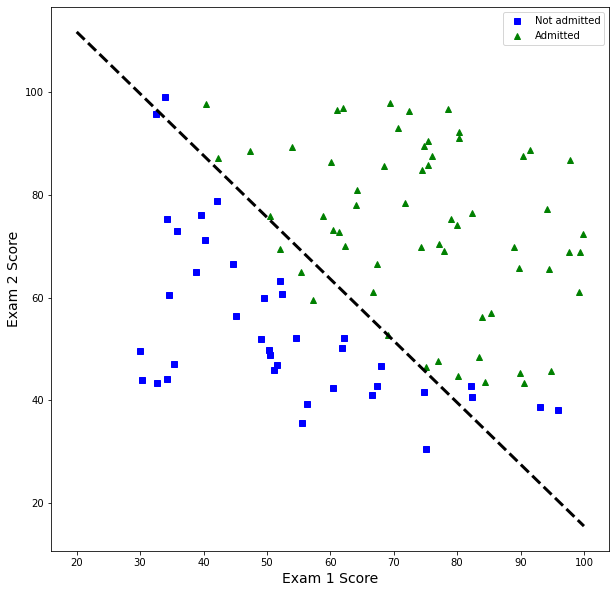

In [85]:
plt.figure(figsize=(10, 10))

# Plot the data for the “Not admitted” entries
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label = "Not admitted")
# Plot the data for the “Admitted” entries with the style of green triangles.

plt.plot(X[y==1, 0], X[y==1, 1], "g^", label = "Admitted")
plt.legend(loc="best")
# Add labels for the coordinates
plt.xlabel("Exam 1 Score", fontsize=14)
plt.ylabel("Exam 2 Score", fontsize=14)
left_right = np.array([20, 100])
# If you save your model to a variable other than “log_reg”, you need to update the following command accordingly.
boundary = -(log_reg.coef_[0][0] * left_right +
log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.show()

* The line that the model uses to separate students who got admitted from those who didn't isn't a perfect line. It means the model might make mistakes and admit some students who shouldn't be or not admit some students who should be.

In [86]:
# a. For a student with Exam 1 score of 45 and Exam 2 score of 85
student_scores = np.array([9, 15]).reshape(1, -1)
probability_of_admission = log_reg.predict_proba(student_scores)
print(f"Probability of admission: {probability_of_admission[0][1]:.2f}")

Probability of admission: 0.00


In [87]:
# b. Print out the prediction results of the test dataset
y_pred = log_reg.predict(X_test)
print(f"Prediction results of the test dataset: {y_pred}")

Prediction results of the test dataset: [0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1]


In [88]:
# c. Print out the score of the model
model_score = log_reg.score(X_test, y_test)
print(f"Model score: {model_score:.2f}")

Model score: 0.85


In [89]:
# d. Print out the confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[10  2]
 [ 1  7]]


In [90]:
# e. Calculate Precision, Recall, and F1-Score
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

## Print Results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.78
Recall: 0.88
F1-Score: 0.82


**Formulas**

* Precision (P): Precision measures how many of the predicted positive instances were actually positive. It is calculated as:

    Precision = TP / (TP + FP) = 0.78

* Recall (R): Recall, also known as Sensitivity or True Positive Rate, measures how many of the actual positive instances were correctly predicted as positive. It is calculated as:

    Recall = TP / (TP + FN) = 0.88

* F1-Score: The F1-Score is the harmonic mean of Precision and Recall. It provides a balanced measure of a model's performance. It is calculated as:

    F1-Score = 2 * (Precision * Recall) / (Precision + Recall)

    F1-Score = 2 * (0.78 * 0.88) / (0.78 + 0.88)

    F1-Score ≈ 0.82

**Analysis**

My initial thought is that this model represents the data quiet well and the problem is fairly relatable. The linear boundary is fairly accurate, reflected by the each of the metric scores. This type of model demonstrates a potential application for the type of regression, since it could be a useful tool for schools/institutions that are highly selective. Given that this data set is for school admissions, I'd prefer to gear the model more towards precision than recall - for this scenario I would imagine a university being more willing to admit an ill-equiped student than turn away a student who is qualified. By this I mean reducing the instance of false negatives, since that would be a student being not admitted despite meeting the criteria. I would want to attempt other solvers, first being liblinear since its known for good performance on smaller datasets; I did a quick test of this and the score increased but the number of false positives increased significantly as well. From the standpoint of ensuring the highest recall, this should help but then there is the issue of how many false positives are acceptable since the visualization looks like it overcorrected and could be dialed back some. To do that I'd look at adjusting C, the inverse regularization strength, so that the model is slightly less regularized. In tweaking, I found 1.5 to be a good middleground that gave less false positives and also retained the previous gain of removing false negatives.